In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci

In [ ]:
sns.set()

###Punto A:

In [ ]:
#constantes
K_b=1.38e-23
c=2.99e8
h=6.625e-34
J_eV=1.602e-19
T=[10000,8000,5000,3000]
form="{}K"

#### Ecuacion de planck:
$$u_{\lambda}(\lambda,T)=\frac{8\pi h}{\lambda^3(e^{\frac{hc}{\lambda k_bT}}-1)}$$

In [ ]:
onda=np.arange(0.01,2.01,0.001)
onda_m= onda*1e-6 #[m]


In [ ]:
def planck_ld(T,l_onda):
    prob=1/(np.exp((h*c)/(l_onda*T*K_b))-1)
    return ((8*np.pi*h)/(l_onda**3))*prob

In [ ]:
planck=[]
for i in T:
    planck_Ti= planck_ld(i,onda_m)
    planck.append(planck_Ti)

Text(0, 0.5, '$dE/d\\lambda [J/m^3]m^{-1}$')

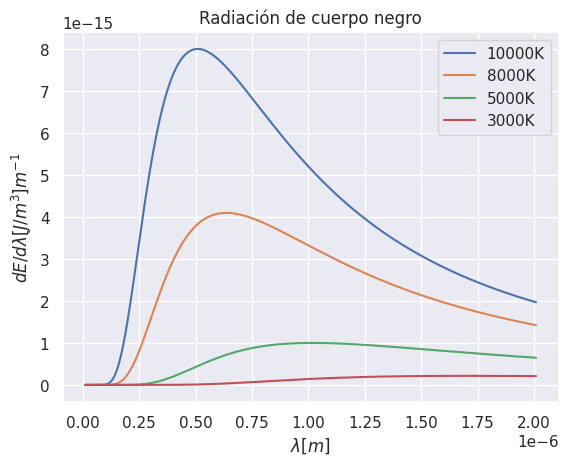

In [ ]:
plt.figure()
plt.title("Radiación de cuerpo negro")

for i in range(0,len(planck)):
    plt.plot(onda_m,planck[i],label=form.format(T[i]))


plt.legend()
plt.xlabel("$\lambda[m]$")
plt.ylabel("$dE/d\lambda [J/m^3]m^{-1}$")

###Punto B

In [ ]:
long_max_I=[]
long_mLambda=[]
for i in planck:
    long_max_I.append(max(i))
for i in range(0,len(long_max_I)):
    for j in range(0,len(onda_m)):
        i_act=planck_ld(T[i],onda_m[j])
        if i_act == long_max_I[i]:
            long_mLambda.append(round(onda_m[j]*1e9,2))
            break

In [ ]:
st="{}nm pertenece a {}"
long_mLambda

[509.0, 636.0, 1018.0, 1696.0]

In [ ]:
denom=["Visible(azul-verde)","Visible(amarillo-naranja)","infrarojo","infrarojo"]

for i in range(0,len(long_mLambda)):
    print(st.format(long_mLambda[i],denom[i]))

509.0nm pertenece a Visible(azul-verde)
636.0nm pertenece a Visible(amarillo-naranja)
1018.0nm pertenece a infrarojo
1696.0nm pertenece a infrarojo


In [ ]:
f=(np.arange(0.001,4.001,0.001))*1e15

###Punto C

In [ ]:
def planck_f(T,f):
    prob=(f*h)/(np.exp((h*f)/(T*K_b))-1)
    return ((8*np.pi*f**2)/(c**3))*prob

In [ ]:
def wien(T,f):
  prob=((8 * np.pi * h * f**3) / (c**3))
  return prob*(1 / (np.exp((h * f) / (K_b * T))))

In [ ]:
def reyleigh(T,f):
  frac=8*np.pi/c**3
  return frac*K_b*T*f**2

Text(0, 0.5, 'dE/df $[J/m^3]Hz^{-1}$')

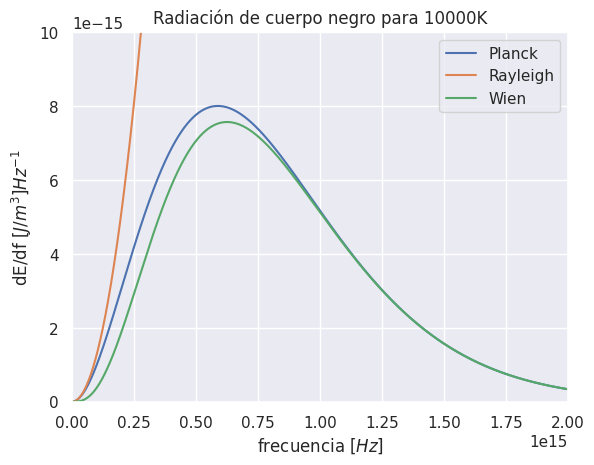

In [ ]:
plt.figure()
plt.title("Radiación de cuerpo negro para "+str(T[0])+'K')

plt.plot(f,planck_f(T[0],f),label='Planck')
plt.plot(f,reyleigh(T[0],f),label='Rayleigh')
plt.plot(f,wien(T[0],f),label='Wien')

plt.legend()
plt.xlim(0,2e15)
plt.ylim(0,1e-14)
plt.xlabel("frecuencia $[Hz]$")
plt.ylabel("dE/df $[J/m^3]Hz^{-1}$")

In [ ]:
densidad_p=(planck_f(T[0],f))
densidad_w=(wien(T[0],f))
densidad_r=(reyleigh(T[0],f))

1.2802220287182333e-31
8.620938748093377e-25


In [ ]:
MSE=np.mean(((densidad_p-densidad_w)**2))
MSE2=np.mean(((densidad_r-densidad_p)**2))

In [ ]:
d_area1=sci.integrate.simps(np.abs(densidad_p-densidad_w),f)

d_area2=sci.integrate.simps(np.abs(densidad_r-densidad_p),f)

In [ ]:
print(f"Error cuadrático medio Wien-Planck (MSE): {MSE:.3e}")
print(f"Error cuadrático medio Rayleigh-Planck (MSE): {MSE2:.3e}")
print(f"Área bajo la curva de diferencia absoluta de la curva de Wien y Planck: {d_area1:.3e}")
print(f"Área bajo la curva de diferencia absoluta de la curva de Rayleigh y Planck: {d_area2:.3e}")

Error cuadrático medio Wien-Planck (MSE): 1.280e-31
Error cuadrático medio Rayleigh-Planck (MSE): 8.621e-25
Área bajo la curva de diferencia absoluta de la curva de Wien y Planck: 5.792e-01
Área bajo la curva de diferencia absoluta de la curva de Rayleigh y Planck: 2.760e+03


Como se puede ver, la funcion de Rayleigh tiene un eror cuadratico mucho mayor al de wien. Basicamente lo que estew me dice es que tal alejada esta la funcion de la esperada (la cual en este caso es la de planck).

Esto tambien lo podemos evidenciar en el area bajo la curva que hay entre la funcion de rayleigh y la de planck. Ya que esta diferencia, en la de Rayleigh, es muchisimo mas grande que la de wien (con una diferencia de mas o menos 4 ordenes de magnitud).